In [2]:
import requests

def get_content(article_name):
    response = requests.get(
        'https://en.wikipedia.org/w/api.php',
        params={
            'action': 'query',
            'format': 'json',
            'titles': article_name,
            'prop': 'extracts',
            'exintro': True,
            'explaintext': True,
            'rvsection' : 0,
            'rvprop' : 'content',
        }).json()
    
    return response

In [3]:
data = get_content('Ozone_layer')
print(data)

{'warnings': {'main': {'*': 'Unrecognized parameters: rvsection, rvprop.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Ozone_layer', 'to': 'Ozone layer'}], 'pages': {'22834': {'pageid': 22834, 'ns': 0, 'title': 'Ozone layer', 'extract': 'The ozone layer or ozone shield is a region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.The ozone layer was discovered in 1913 by the French physicists Charles Fabry and Henri Buis

In [4]:
def merge_contents(data):
    res = next(iter(data['query']['pages'].values()))
    return res['extract']

In [5]:
merge_content = merge_contents(data)
print(merge_content)

The ozone layer or ozone shield is a region of Earth's stratosphere that absorbs most of the Sun's ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth's atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.The ozone layer was discovered in 1913 by the French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out from its surface and reaching the ground on Earth is usually consistent with the spectrum of a black body with a temperature in the range of 5,500–6,000 K (5,230–5,730 °C), except that there 

In [6]:
import re

def tokenize(content):
    delimiters = ' ', '\n', '-', '.', '(', ')', ','
    regexPattern = '|'.join(map(re.escape, delimiters))
    l = re.split(regexPattern, content)
    return [token for token in l if token != '']

collection = tokenize(merge_content)
print(collection)

['The', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', "Earth's", 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', "Sun's", 'ultraviolet', 'radiation', 'It', 'contains', 'a', 'high', 'concentration', 'of', 'ozone', 'O3', 'in', 'relation', 'to', 'other', 'parts', 'of', 'the', 'atmosphere', 'although', 'still', 'small', 'in', 'relation', 'to', 'other', 'gases', 'in', 'the', 'stratosphere', 'The', 'ozone', 'layer', 'contains', 'less', 'than', '10', 'parts', 'per', 'million', 'of', 'ozone', 'while', 'the', 'average', 'ozone', 'concentration', 'in', "Earth's", 'atmosphere', 'as', 'a', 'whole', 'is', 'about', '0', '3', 'parts', 'per', 'million', 'The', 'ozone', 'layer', 'is', 'mainly', 'found', 'in', 'the', 'lower', 'portion', 'of', 'the', 'stratosphere', 'from', 'approximately', '15', 'to', '35', 'kilometers', '9', 'to', '22', 'mi', 'above', 'Earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'and', 'geographically', 'The', 'ozone', 'layer', 'was',

In [7]:
def lower_collection(collection):
    for i in range(len(collection)):
        collection[i] = collection[i].lower()

lower_collection(collection)

In [10]:
def count_frequency(collection):
    freq_model = {}
    for i in collection:
        if i not in freq_model:
            freq_model[i] = 1
        else:
            freq_model[i] += 1
  
    return freq_model

frequencies = count_frequency(collection)

In [11]:
def print_most_frequent(frequencies, n):
    a = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)
    for i in range(n):
        print(a[i])

print_most_frequent(frequencies, 10)

('the', 38)
('ozone', 18)
('of', 18)
('in', 12)
('to', 12)
('a', 10)
('layer', 8)
('that', 8)
('is', 6)
('radiation', 6)


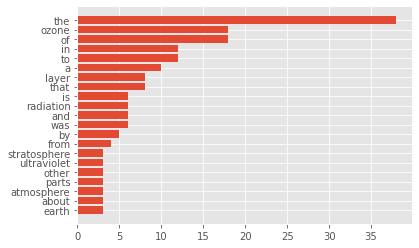

In [12]:
import matplotlib.pyplot as plt

def visulalize(frequencies, n):
    a = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)
    keys = []
    values = []
    for i in range(n,-1,-1):
        keys.append(a[i][0])
        values.append(a[i][1])
  
    plt.style.use('ggplot')
    plt.barh(keys, values)
    plt.show()

visulalize(frequencies, 20)

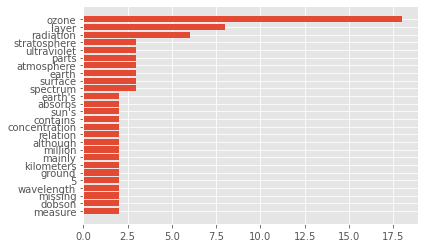

In [13]:
stop_words = ["the", "a", "of", "to", "in", "about",
             "is", "that", "and", "was", "by", "from",
             "other", "its", "on", "nm", "or", "it",
             "as", "an", "with", "has", "at", "per",
             "being", "for", "above", "which", "were",
             "who", "below", "be"]

def remove_stop_words(words, stop_words):
    return [word for word in words if word not in stop_words]

filtered_collection = remove_stop_words(collection, stop_words)
filtered_freq = count_frequency(filtered_collection)
visulalize(filtered_freq, 25)